<a href="https://colab.research.google.com/github/Tyeisha25/estimacion-de-pi/blob/main/Copia_de_Uso_de_los_n%C3%BAmeros_aleatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso de los números aleatorios

## 1. Introducción al Módulo random

El módulo random de la librería estándar de Python incluye un conjunto de funciones que permiten obtener de distintos modos 
números pseudoaleatorios a través del algoritmo [Mersenne Twister](https://es.wikipedia.org/wiki/Mersenne_twister).

In [ ]:
#importamos el módulo que vamos a usar 

import random   

Las funciones de los módulos se invocan con el formato: módulo.función().

En el módulo random existe la función random, que devuelve un número aleatorio que sigue una distribución uniforme. 

Así, para obtener $x \sim U(0,1)$:

In [ ]:
x = random.random()  #Cada ejecución dará un número distinto.
print(x)

0.7580862799906349


Se puede usar algún bucle si se desea generar una secuencia $x_i \sim U(0,1)$ con $i = 1, 2, 3,..., N$:

In [ ]:
for i in range(10):
    print('%05.4f' % random.random(), end=' ')  #El código en rojo indica la cantidad de dígitos y de decimales a mostrar.
print()

0.2141 0.5460 0.7497 0.1795 0.7034 0.6614 0.2538 0.4679 0.5961 0.4167 


In [ ]:
for i in range(10):
    print('%05.4f' % random.random(), sep="\t")
print()

0.4448
0.2839
0.2487
0.5333
0.7205
0.9579
0.6148
0.0843
0.3303
0.7374



La función seed() fija el valor de la semilla en la generación de la secuencia de números aleatorios. 
Esto es útil cuando se quieren utilizar los mismos datos de entrada en una simulación.

In [ ]:
random.seed(1) #primero fijamos la semilla

for i in range(20):
    print('%05.4f' % random.random(), end=' ')
print()

0.1344 0.8474 0.7638 0.2551 0.4954 0.4495 0.6516 0.7887 0.0939 0.0283 0.8358 0.4328 0.7623 0.0021 0.4454 0.7215 0.2288 0.9453 0.9014 0.0306 


## Ejercicio 1: 
    a)Usar la función random() para simular 1 volado.
    b)Usar la función random() para simular 1000 volados.
    c)Determinar de b) la probabilidad de que ocurra "sol" en un volado. 

La función uniform() devuelve un número float incluido entre los valores indicados.

In [ ]:
for i in range(10):
    print('%5.4f' %random.uniform(1, 50), end=' ')
print()

2.2468 27.5292 47.0183 19.6790 11.6134 21.6837 2.4230 11.8629 22.4565 25.2948 


La función randint() devuelve un número entero incluido entre los valores indicados. 
Los valores de los límites inferior y superior también pueden aparecer entre los valores devueltos.

In [ ]:
for i in range(20):
    print(random.randint(-100, 100), end=' ')
print()

-41 -12 -41 73 -44 94 17 -26 -95 6 42 64 -75 -53 61 85 -25 -70 90 -15 


## Ejercicio 2:
    a) Simular un sorteo de los colores blanco, negro, rojo, azul y verde.
    b) Simular 5 sorteos con sustitución.

La función randrange() devuelve enteros que van desde un valor inicial a otro final 
separados entre sí un número de valores determinados.

In [ ]:
for i in range(20):
    print(random.randrange(0, 20, 3), end=' ')
print()

15 15 12 9 12 18 15 3 6 6 12 9 18 12 9 12 18 0 9 3 


# 2. Estimación del número $\pi$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

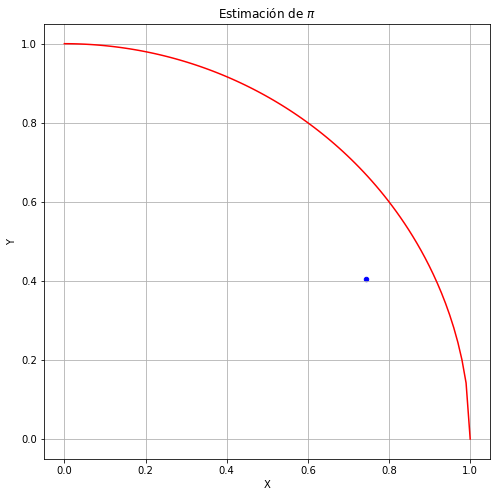

In [ ]:
x = np.linspace(0, 1, 100)
y = np.sqrt(1 - x**2)               # Ecuación del círculo en el primer cuadrante 


x_1 = random.random()
y_1 = random.random()

fig = plt.figure(1, figsize=(8, 8))        # Aquí fijamos el formato de la gráfica para que sea cuadrada.
plt.plot(x, y, color="red", markersize=1) 
plt.scatter(x_1, y_1, s=20, c="blue")
plt.title("Estimación de $\pi$")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

# Tarea 1. 
    Estimar el valor de pi usando la función random

## La aproximación analítica

Partamos de la ecuación:

##     $\pi = 4\arctan 1$

y usemos la aproximación de Taylor para expandir en una serie de potencias.

Recordar:

$f(x) = f(0) + f´(x)x + \frac{1}{2}f´´(0)x^2 + ...$

$Si f(x) = \arctan x$ entonces:

$f´(x) = \frac{d \arctan x}{dx} = \frac{1}{1 + x^2} \rightarrow f´(0) = 1$

$f´´(x) = \frac{d^2 \arctan x}{d^2x} = - \frac{2x}{(1 + x^2)^2} \rightarrow f´´(0) = 0$

...

$f^{2i + 1}(x) = (-1)^{i} \frac{(2i)!}{(1 + x^2)^{2i + 1}} \rightarrow f^{2i + 1}(0) = (-1)(2i)!$

$f^{2i}(x) = 0$

Entonces:

$\arctan x = \sum_{i = 0} (-1)^{i} \frac{x^{2i + 1}}{2i + 1}$

Por tanto:

## $\pi = \sum_{i = 0} (-1)^{i} \frac{4}{2i + 1}$

In [ ]:
def pi_taylor(n):
    pi = 0
    for i in range(n):
        pi = pi + 4.0/(2*i+1)*(-1)**i
        print(i, pi)

In [ ]:
pi_taylor(10)

0 4.0
1 2.666666666666667
2 3.466666666666667
3 2.8952380952380956
4 3.3396825396825403
5 2.9760461760461765
6 3.2837384837384844
7 3.017071817071818
8 3.2523659347188767
9 3.0418396189294032


In [ ]:
def pi_Taylor(n):
    pi = 0
    L =[]
    for i in range(n):
        pi = pi + 4.0/(2*i+1)*(-1)**i
        L.append(pi)
    fig = plt.figure(1, figsize=(8, 8))        
#    plt.plot(y=3, color="red", markersize=1) 
    plt.plot(L, color="red", markersize=1)
    plt.xlabel("Iteraciones")
    plt.ylabel("Estimación")
    plt.grid()
    plt.show()

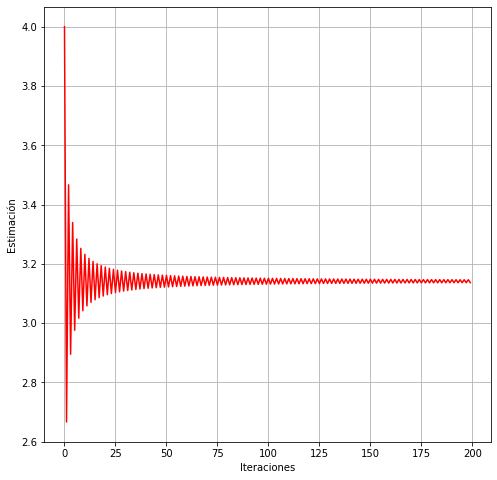

In [ ]:
pi_Taylor(200)

## Ejercicio 3:

Graficar las salidas obtenidas en la Tarea 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

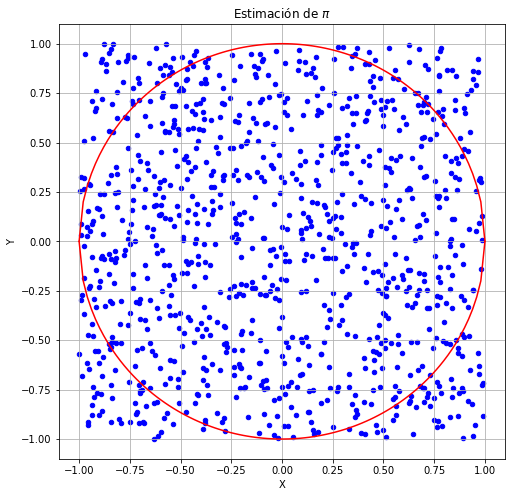

210 790
3.16


In [ ]:
x = np.linspace(-1, 1, 100)
y = -np.sqrt(1 - x**2)    # Ecuación del círculo en el primer cuadrante 
x1 = np.linspace(-1, 1, 100)
y1 = np.sqrt(1 - x**2)    # Ecuación del círculo en el primer cuadrante 
z=1000

puntosx=[]
puntosy=[]
afuera=0
adentro=0

for i in range(z):
  puntosx.append(random.uniform(-1,1))
  puntosy.append(random.uniform(-1,1))

fig = plt.figure(1, figsize=(8, 8))        # Aquí fijamos el formato de la gráfica para que sea cuadrada.
plt.plot(x, y, color="red", markersize=1) 
plt.plot(x1, y1, color="red", markersize=1) 
for i in range(z):
  plt.scatter(puntosx[i], puntosy[i], s=20, c="blue")
  if ((puntosx[i])*(puntosx[i]))+((puntosy[i])*(puntosy[i]))>=1:
    afuera=afuera+1
  else:
    adentro=adentro+1
plt.title("Estimación de $\pi$")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

print(afuera,adentro)
print((adentro/(adentro+afuera))*4)